In [114]:
import pandas as pds
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from __future__ import division
import random
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from scipy import stats
#import graphviz
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_validate 

%matplotlib inline

# Visualisation des données 

In [2]:
df = pds.read_csv('/home/mvernier/Documents/2023-2024/info6/presentation/titanic/train.csv', sep=",") # load a pandas dataframe from csv in current directory
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Après cette magnifique visualisation du jeux de données, on décide de supprimer PasengerId et Name 

# Suppression des données 

on modifie ensuite les données pour n'avoir que des données chiffrées 

In [8]:
sex=[]
for pasenger in df['Sex'] : 
    if (pasenger=='male'):
        sex.append(0)
    else : 
        sex.append(1)
df['Sex']=sex

In [9]:
cabins=[]

for element in df['Cabin']:
    if type(element)==str:
        letter=element[:1]
        if letter=="A":
            cabins.append(1)
        elif letter=="B":
            cabins.append(2)
        elif letter=="C":
            cabins.append(3)
        elif letter=="D":
            cabins.append(4)
        elif letter=="E":
            cabins.append(5)
        elif letter=='F':
            cabins.append(6)
        elif letter=='T':
            cabins.append(7)
        else :
            cabins.append(8)
    else:
        cabins.append(float('nan'))
            
df["Cabin"]=cabins


In [10]:
donnee=df.drop(['PassengerId'], axis=1)
donnee=donnee.drop(['Name'], axis=1)

In [11]:
donnee=donnee.drop(['Ticket'], axis=1)

In [12]:
donnee.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,NaN,S
1,1,1,1,38.0,1,0,71.2833,3.0,C
2,1,3,1,26.0,0,0,7.9250,NaN,S
3,1,1,1,35.0,1,0,53.1000,3.0,S
4,0,3,0,35.0,0,0,8.0500,NaN,S


## On tente de discrétiser la classe age 

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

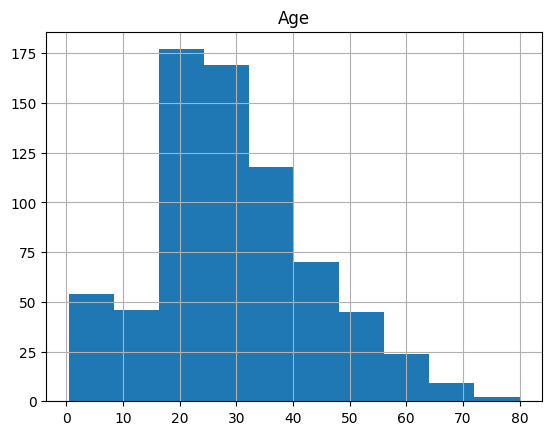

In [13]:
donnee.hist('Age')

In [14]:
donnee['Age'].isnull().sum()

177

On a 177 valeurs manquantes dans Age, on décide donc de supprimer ces passagers

In [15]:
tab=donnee.dropna()

In [16]:
tab['Age'].isnull().sum()

0

In [17]:
age=[]
for x in tab['Age'] :
    if 0<x<18 : 
        age.append(0)
    elif 18<x<25 : 
        age.append(1)
    elif 25<x<40 : 
        age.append(2)
    else :
        age.append(3)
tab['Age']=age
tab.head()

/tmp/ipykernel_16824/588412388.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab['Age']=age


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,1,2,1,0,71.2833,3.0,C
3,1,1,1,2,1,0,53.1000,3.0,S
6,0,1,0,3,0,0,51.8625,5.0,S
10,1,3,1,0,1,1,16.7000,8.0,S
11,1,1,1,3,0,0,26.5500,3.0,S


In [29]:
tab=tab.drop(['Embarked'], axis=1)

# Random forest

In [42]:
survie=[]
classes = tab.loc[:,"Survived"]
for x in classes : 
    if x==0 : 
        survie.append('mort')
    else : 
        survie.append('survie')
classes=survie

In [43]:
dff = tab.drop(['Survived'],axis=1) # on cherche à prédire qui survie 

In [108]:
X_train, X_test, y_train, y_test = train_test_split(dff,classes , test_size=0.33, random_state=10)

In [109]:
type(X_train)

pandas.core.frame.DataFrame

In [110]:
model = ensemble.RandomForestClassifier(n_estimators=50, criterion = 'entropy', random_state=10,
                                        min_samples_leaf=3,bootstrap=True)

In [111]:
model.fit(X_train, y_train)
sortedLabelList = sorted(list(set(classes)))
print(sortedLabelList)
y_predict_train = model.predict(X_train)
metrics.confusion_matrix(y_true=y_train, y_pred=y_predict_train, labels=sortedLabelList)

['mort', 'survie']


array([[30, 10],
       [ 4, 78]])

In [112]:
y_predict = model.predict(X_test)
print(y_predict[0:5])
print(metrics.accuracy_score(y_test, y_predict))

['survie' 'survie' 'mort' 'survie' 'survie']
0.7704918032786885


In [113]:
sortedLabelList = sorted(list(set(classes)))
metrics.confusion_matrix(y_true=y_test, y_pred=y_predict, labels=sortedLabelList)

array([[11,  9],
       [ 5, 36]])

In [88]:
sortedLabelList

['mort', 'survie']

In [89]:
pds.DataFrame(
    metrics.confusion_matrix(y_true=y_test, y_pred=y_predict, labels=sortedLabelList),
    columns=['Predicted ' + str(className) for className in sortedLabelList],
    index=['True ' + str(className) for className in sortedLabelList]
)

,Predicted mort,Predicted survie
True mort,11,9
True survie,5,36


In [90]:
print(metrics.classification_report(y_test, y_predict))  

              precision    recall  f1-score   support

        mort       0.69      0.55      0.61        20
      survie       0.80      0.88      0.84        41

    accuracy                           0.77        61
   macro avg       0.74      0.71      0.72        61
weighted avg       0.76      0.77      0.76        61



In [91]:
pds.DataFrame(model.predict_proba(X_test),
    columns=['Predicted ' + className for className in sortedLabelList]).head(10)

,Predicted mort,Predicted survie
0,0.217857,0.782143
1,0.096292,0.903708
2,0.625712,0.374288
3,0.079413,0.920587
4,0.166635,0.833365
5,0.129351,0.870649
6,0.486020,0.513980
7,0.427270,0.572730
8,0.551892,0.448108
9,0.413835,0.586165


## Cross validation 

In [55]:
model2 = tree.DecisionTreeClassifier(criterion = 'entropy', random_state=10, min_samples_leaf=3)

In [56]:
scoring = ['accuracy', 'precision_macro', 'precision_weighted', 'recall_macro', 'recall_weighted', 'f1_macro', 'f1_weighted']
#cv = KFold(n_splits=5, random_state=10, shuffle=True)
cv = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
scores = cross_validate(model, dff, classes, scoring=scoring,
                        cv=cv, return_train_score=False)
#scores = cross_validate(model, dff, classes, scoring=scoring,
#                        cv=5, return_train_score=False)
#cv = 5 folds made by StratifiedKFold (default) for sklearn classifiers (all classifiers of class ClassifierMixin)
scores.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_precision_weighted', 'test_recall_macro', 'test_recall_weighted', 'test_f1_macro', 'test_f1_weighted'])

In [58]:
print('Global accuracy over all folds: %0.6f (+/- %0.6f)'
      % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print('For each metric, list the score values on each fold:')
for metric in sorted(scores.keys()):
    print(str(['{:.6f}'.format(value) for value in scores[metric]]) + ' ' +metric)
    

Global accuracy over all folds: 0.727027 (+/- 0.100219)
For each metric, list the score values on each fold:
['0.052905', '0.047569', '0.046995', '0.047216', '0.050788'] fit_time
['0.009732', '0.009579', '0.009305', '0.009445', '0.010607'] score_time
['0.783784', '0.648649', '0.702703', '0.722222', '0.777778'] test_accuracy
['0.741259', '0.589940', '0.634322', '0.707792', '0.759197'] test_f1_macro
['0.778114', '0.644455', '0.689881', '0.729437', '0.781494'] test_f1_weighted
['0.757407', '0.592657', '0.652778', '0.706250', '0.753247'] test_precision_macro
['0.777578', '0.641183', '0.686937', '0.754167', '0.790043'] test_precision_weighted
['0.731667', '0.588333', '0.628333', '0.729167', '0.770833'] test_recall_macro
['0.783784', '0.648649', '0.702703', '0.722222', '0.777778'] test_recall_weighted


## KNN

<Axes: >

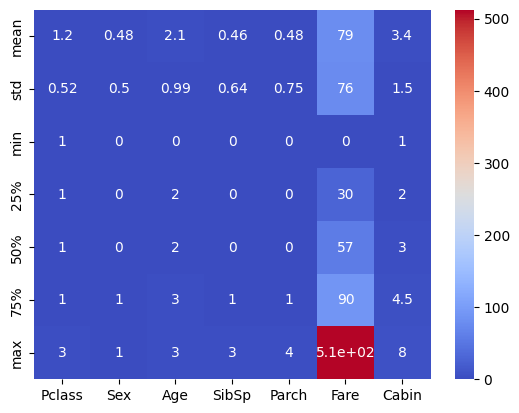

In [115]:
stats = dff.describe()
stats = stats.drop('count',axis=0)
sns.heatmap(stats,annot=True,cmap='coolwarm')

In [117]:
from sklearn.preprocessing import StandardScaler
zscore = StandardScaler().fit(dff)
X_z = pds.DataFrame(zscore.transform(dff), index=dff.index, columns=dff.columns)
X_z.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
count,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02
mean,3.882747e-17,1.116290e-16,-1.358962e-16,-1.456030e-17,3.882747e-17,1.140557e-16,1.358962e-16
std,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00
min,-3.722562e-01,-9.624530e-01,-2.111828e+00,-7.230443e-01,-6.317298e-01,-1.033406e+00,-1.610144e+00
25%,-3.722562e-01,-9.624530e-01,-7.780420e-02,-7.230443e-01,-6.317298e-01,-6.433299e-01,-9.509578e-01
50%,-3.722562e-01,-9.624530e-01,-7.780420e-02,-7.230443e-01,-6.317298e-01,-2.847750e-01,-2.917711e-01
75%,-3.722562e-01,1.039012e+00,9.392078e-01,8.336275e-01,6.970812e-01,1.486431e-01,6.970088e-01
max,3.520480e+00,1.039012e+00,9.392078e-01,3.946971e+00,4.683514e+00,5.695465e+00,3.004162e+00


<Axes: >

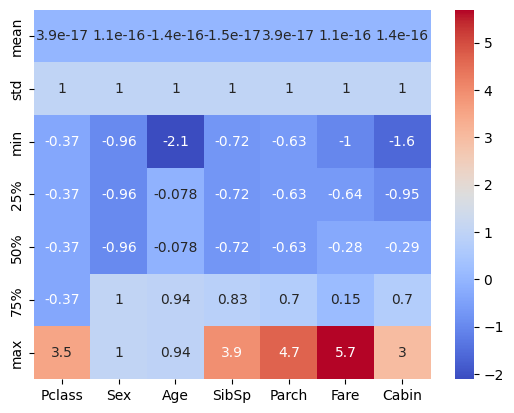

In [118]:
stats = X_z.describe()
stats = stats.drop('count',axis=0)
sns.heatmap(stats,annot=True,cmap='coolwarm')

In [122]:
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

scoring = ['accuracy',
           'precision_weighted',
           'recall_weighted',
           'f1_weighted']

knn = KNeighborsClassifier()
scores = cross_validate(knn, dff, classes, scoring=scoring,cv=cv, return_train_score=True)
scores = pds.DataFrame(scores).mean()

knn = KNeighborsClassifier()
scores_z = cross_validate(knn, X_z, classes, scoring=scoring,cv=cv, return_train_score=True)
scores_z = pds.DataFrame(scores_z).mean()

<Axes: >

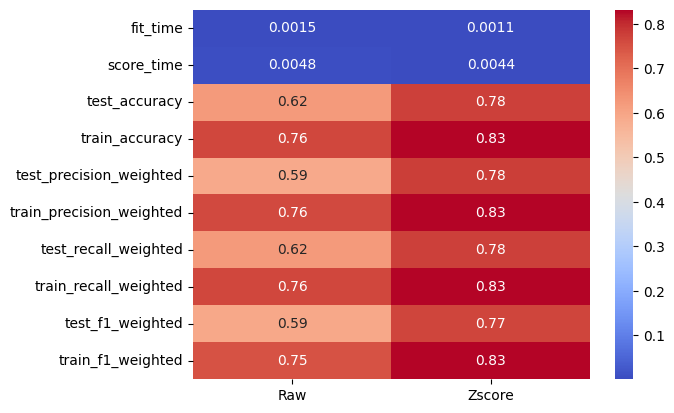

In [123]:
full_scores = pds.DataFrame({"Raw": scores, "Zscore":scores_z})
sns.heatmap(full_scores,annot=True,cmap='coolwarm')

In [124]:
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

n_neighbors = [1,3,5]
weights = ["uniform", "distance"]
distances = ["euclidean","manhattan"]

scoring = ['accuracy',
           'precision_weighted',
           'recall_weighted',
           'f1_weighted']

full_scores = {}
for k in n_neighbors:
    for d in distances:
        for w in weights:
            knn = KNeighborsClassifier(n_neighbors=k, weights=w, metric=d)
            scores = cross_validate(knn, X_z, classes, scoring=scoring,cv=cv, return_train_score=True)
            scores = pds.DataFrame(scores).mean()
            full_scores[str(k)+"-"+d+"-"+w] = scores